In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [5]:
from google.colab import files
myfile = files.upload()
myfile2 = files.upload()

I1 = cv2.imread('chalks_light.tif', cv2.IMREAD_COLOR)
I2 = cv2.imread('stream_dark.tif', cv2.IMREAD_COLOR)


from google.colab.patches import cv2_imshow 
cv2_imshow(I1)
cv2_imshow(I2)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
def gammaTransformation(gamma, r):
    c = 255 / (255**gamma)                                    # s=cr^gamma 에서 s가 8bit 영상 기준 최대값인 255가 되도록 하는 c를 구현하세요. (pdf 문서 참조)
    return np.array( c*(r**gamma), dtype = 'uint8')  # A power-law 공식을 구현하세요. 

In [55]:
#원본이미지를 BGR형태에서 RGB형태로
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2RGB)
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2RGB)

#step2 : 원본이미지들을 RGB domain에서 gamma transformation
I1_gamma = gammaTransformation(2.5, I1)
I2_gamma = gammaTransformation(1/2.5, I2)

In [56]:
#step3 : 원본이미지들을 YCbCr domain에서 Y(밝기정보)만을 gamma transformation
I1_ycrcb = cv2.cvtColor(I1, cv2.COLOR_RGB2YCR_CB)
I1_ycrcb[:,:,0] = gammaTransformation(2.5, I1_ycrcb[:,:,0]) #Y영역을 gamma transformation
I1_ycrcb_RGB = cv2.cvtColor(I1_ycrcb,cv2.COLOR_YCR_CB2RGB) 

I2_ycrcb = cv2.cvtColor(I2, cv2.COLOR_RGB2YCR_CB)
I2_ycrcb[:,:,0] = gammaTransformation(1/2.5, I2_ycrcb[:,:,0]) 
I2_ycrcb_RGB = cv2.cvtColor(I2_ycrcb,cv2.COLOR_YCR_CB2RGB) 

In [57]:
#step4: step2의 결과를 HSV로 변환 후 S영역(채도)를 높임

I1_HSV = cv2.cvtColor(I1_gamma, cv2.COLOR_RGB2HSV)
I1_HSV[:,:,1] = gammaTransformation(1/3, I1_HSV[:,:,1]) #S영역을 gamma transformation
I1_HSV_RGB = cv2.cvtColor(I1_HSV,cv2.COLOR_HSV2RGB)  

I2_HSV = cv2.cvtColor(I2_gamma, cv2.COLOR_RGB2HSV)
I2_HSV[:,:,1] = gammaTransformation(1/3, I2_HSV[:,:,1]) #S영역을 gamma transformation
I2_HSV_RGB = cv2.cvtColor(I2_HSV,cv2.COLOR_HSV2RGB)  

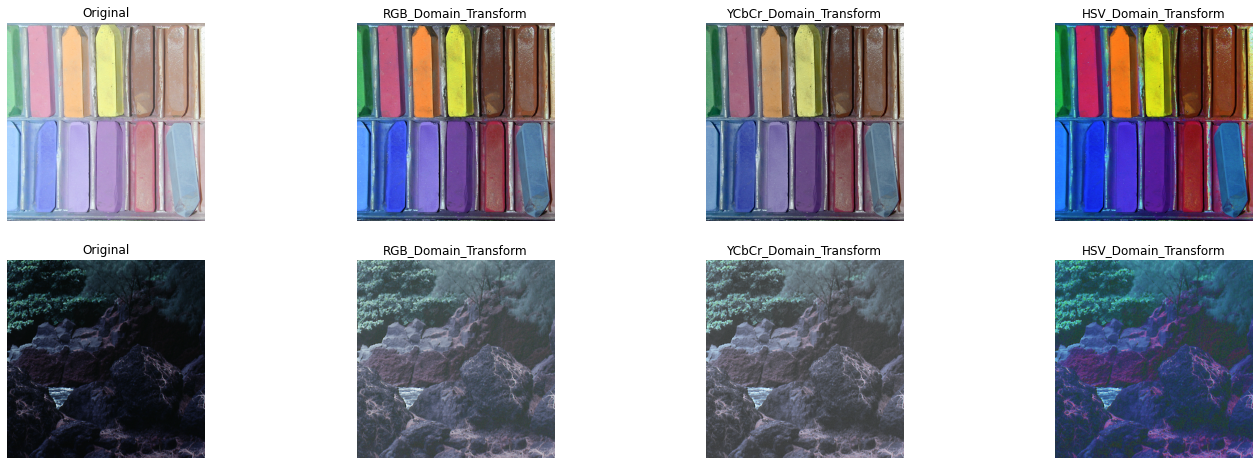

In [58]:
fig = plt.figure(figsize = (24, 8)) 
rows = 2
cols = 4
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(I1)
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(I1_gamma)
ax2.set_title('RGB_Domain_Transform')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(I1_ycrcb_RGB)
ax3.set_title('YCbCr_Domain_Transform')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(I1_HSV_RGB )
ax4.set_title('HSV_Domain_Transform')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(I2 )
ax5.set_title('Original')
ax5.axis("off")

ax6 = fig.add_subplot(rows, cols, 6)
ax6.imshow(I2_gamma )
ax6.set_title('RGB_Domain_Transform')
ax6.axis("off")

ax7 = fig.add_subplot(rows, cols, 7)
ax7.imshow( I2_ycrcb_RGB)
ax7.set_title('YCbCr_Domain_Transform')
ax7.axis("off")

ax8 = fig.add_subplot(rows, cols, 8)
ax8.imshow(I2_HSV_RGB )
ax8.set_title('HSV_Domain_Transform')
ax8.axis("off")

plt.show()